In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d
from scipy import integrate

Есть набор данных speed, который представляет собой значения скорости, для некого транспортного средства в определенный момент наблюдения. Очевидно, что данные имеют дискретный вид. Известно, что наблюдения происходили с периодом в один час.

speed = [25, 35, 45, 30, 60, 120, 100, 100, 70, 75, 80, 65]

1. Примем, что в нулевой координате у нас скорость 25 км/ч, согласно набору данных speed. Поместите в переменную time — вектор времени созданный с помощью np.linspace (всего 12 наблюдений, от 0 до 11 часов)
2. Выполните вывод массива time
3. Выполните вывод графика — значение точек скорости (plot или scatter). Задайте размер отображаемой области (0, 11) и (0, 130). Задайте отображение сетки
4. Выполните интерполяцию с помощью interp1d(kind='cubic') и получите функцию на 10000 значений. Постройте непрерывный график полученной функции.
5. Согласно физическому смыслу первой производной, производная функции в точке есть мгновенная скорость точки. Интегрируя полученное равенство в пределах от t1 до t2 получаем

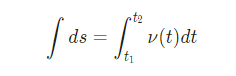


Тогда путь, пройденный точкой при неравномерном движении по прямой с переменной скоростью ν(t) за отрезок времени [t1, t2] выражается интегралом

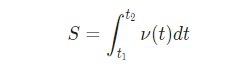

Вычислите интеграл для полученной интерполяционной функции на промежутке [0, 11]

6. Выполните также пункты 4 и 5 для kind='quadratic'

In [ ]:
speed = np.array([25, 35, 45, 30, 60, 120, 100, 100, 70, 75, 80, 65])
time = np.linspace(0, 12, 12, endpoint=False)
time

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

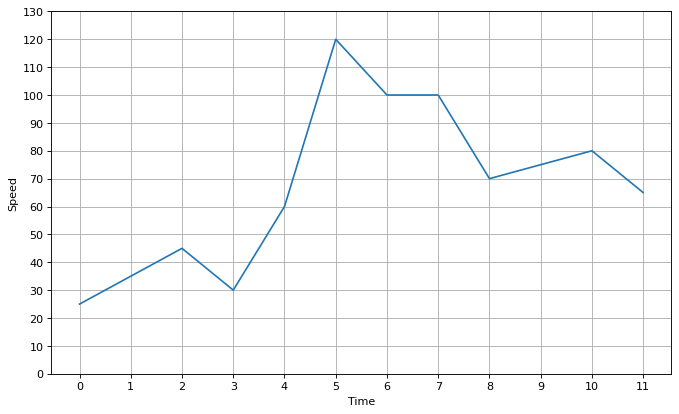

In [ ]:
plt.figure(figsize = (10, 6), dpi = 80)
plt.grid()
plt.plot(time, speed)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.xticks(np.arange(0, 12, step=1))
plt.yticks(np.arange(0, 140, step=10))
plt.show()

In [ ]:
val = np.linspace(0, 11, 10000, endpoint=False)

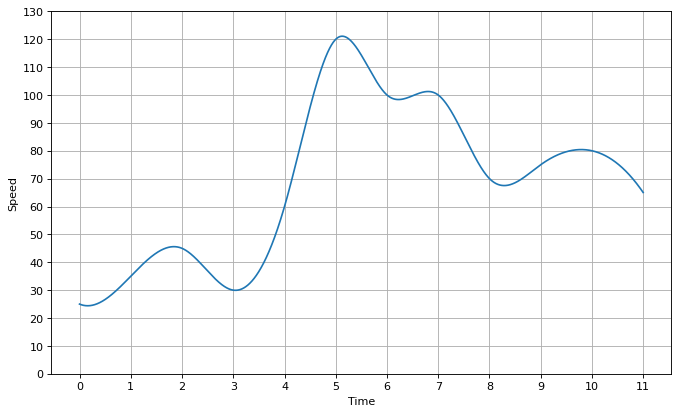

In [ ]:
f_cubic = interp1d(time, speed, kind='cubic')

plt.figure(figsize = (10, 6), dpi = 80)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.plot(val, f_cubic(val))
plt.grid()
plt.xticks(np.arange(0, 12, step=1))
plt.yticks(np.arange(0, 140, step=10))

plt.show()

In [ ]:
result_cubic = integrate.quad(f_cubic, 0, 11)
result_cubic

(761.586477590826, 8.076465307417539e-06)

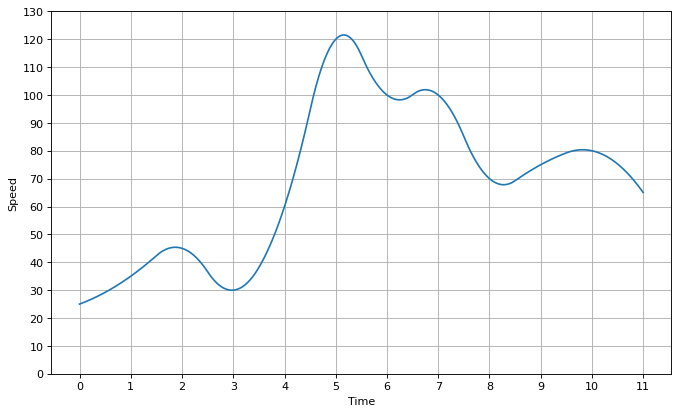

In [ ]:
f_quadratic = interp1d(time, speed, kind='quadratic')

plt.figure(figsize = (10, 6), dpi = 80)
plt.xlabel('Time')
plt.ylabel('Speed')
plt.plot(val, f_quadratic(val))
plt.grid()
plt.xticks(np.arange(0, 12, step=1))
plt.yticks(np.arange(0, 140, step=10))

plt.show()

In [ ]:
result_quadratic = integrate.quad(f_quadratic, 0, 11)
result_quadratic

(762.7374192196539, 8.90840455225548e-06)